# <div align = 'center'>An analysis of Netflix Originals</div>
* One of the world's most popular OTT platform, Netflix started producing digital entertainment under it's own banner, calling it 'Originals'.  
* It received mixed-reactions from audiences around the world.  
* Here we try to analyse these movies based on their Genre, Language of production, Runtime and audience-rated IMDB scores. 

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="netflix-analysis")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "apoorvaanurag/netflix-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/apoorvaanurag/netflix-analysis


'https://jovian.ai/apoorvaanurag/netflix-analysis'

## Installing and importing necessary libraries

In [4]:
!pip install opendatasets numpy pandas matplotlib seaborn pandas-profiling --upgrade --quiet

In [5]:
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

## Sourcing csv file from Kaggle

In [6]:
od.download('https://www.kaggle.com/luiscorter/netflix-original-films-imdb-scores')

100%|██████████| 12.4k/12.4k [00:00<00:00, 9.32MB/s]

In [7]:
import os
os.listdir('netflix-original-films-imdb-scores')

['NetflixOriginals.csv']

In [8]:
films = pd.read_csv('netflix-original-films-imdb-scores/NetflixOriginals.csv', encoding = "ISO-8859-1")

In [9]:
films

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [10]:
films.rename(columns={'IMDB Score' : 'IMDB'}, inplace=True)

## Converting datatype of Premiere to datetime
using pd.to_datetime

In [11]:
films['Premiere'] = pd.to_datetime(films['Premiere'])

In [12]:
films

,Title,Genre,Premiere,Runtime,IMDB,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [13]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "apoorvaanurag/netflix-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/apoorvaanurag/netflix-analysis


'https://jovian.ai/apoorvaanurag/netflix-analysis'

## Splitting year and month into separate columns
This will assist us when we analyse later based on years and months.

In [14]:
films['Year'] = pd.DatetimeIndex(films['Premiere']).year
films['Month'] = pd.DatetimeIndex(films['Premiere']).month

In [15]:
films

,Title,Genre,Premiere,Runtime,IMDB,Language,Year,Month
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018,12
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015,10
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018,12
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020,12


## Getting info on datatypes of columns
Also confirming the change in Premiere

In [16]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Title     584 non-null    object        
 1   Genre     584 non-null    object        
 2   Premiere  584 non-null    datetime64[ns]
 3   Runtime   584 non-null    int64         
 4   IMDB      584 non-null    float64       
 5   Language  584 non-null    object        
 6   Year      584 non-null    int64         
 7   Month     584 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 36.6+ KB


In [17]:
films.sort_values(by=['IMDB'], ascending=False, inplace=True)
films.reset_index(drop=True, inplace=True)
films

,Title,Genre,Premiere,Runtime,IMDB,Language,Year,Month
0,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020,10
1,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020,12
2,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018,12
3,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015,10
4,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018,12
...,...,...,...,...,...,...,...,...
579,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10
580,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1
581,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12
582,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8


In [18]:
films.Language.unique()

array(['English', 'Portuguese', 'English/Ukranian/Russian', 'Spanish',
       'English/Akan', 'Hindi', 'Korean', 'English/Hindi',
       'English/Korean', 'Spanish/English', 'Italian', 'English/Spanish',
       'English/Russian', 'English/Mandarin', 'English/Arabic',
       'Khmer/English/French', 'Tamil', 'Marathi', 'Dutch', 'Bengali',
       'Indonesian', 'French', 'Georgian', 'Japanese', 'Thia/English',
       'Turkish', 'English/Taiwanese/Mandarin', 'English/Swedish',
       'German', 'Spanish/Catalan', 'English/Japanese', 'Thai', 'Polish',
       'Spanish/Basque', 'Filipino', 'Swedish', 'Norwegian', 'Malay'],
      dtype=object)

In [19]:
films.loc[films.Language.str.contains('Thia/English'),'Language'] = 'Thai/English'

In [20]:
films.Language.unique()

array(['English', 'Portuguese', 'English/Ukranian/Russian', 'Spanish',
       'English/Akan', 'Hindi', 'Korean', 'English/Hindi',
       'English/Korean', 'Spanish/English', 'Italian', 'English/Spanish',
       'English/Russian', 'English/Mandarin', 'English/Arabic',
       'Khmer/English/French', 'Tamil', 'Marathi', 'Dutch', 'Bengali',
       'Indonesian', 'French', 'Georgian', 'Japanese', 'Thai/English',
       'Turkish', 'English/Taiwanese/Mandarin', 'English/Swedish',
       'German', 'Spanish/Catalan', 'English/Japanese', 'Thai', 'Polish',
       'Spanish/Basque', 'Filipino', 'Swedish', 'Norwegian', 'Malay'],
      dtype=object)

The following code will help in separating unique values from the slashed coupling format of Language's elements.

In [21]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split('/'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [22]:
lang_df = split_multicolumn(films.Language)

In [23]:
lang_df

,English,Portuguese,Ukranian,Russian,Spanish,Akan,Hindi,Korean,Italian,Mandarin,...,Turkish,Taiwanese,Swedish,German,Catalan,Polish,Basque,Filipino,Norwegian,Malay
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
580,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
582,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### What is the most preferred language, partially or completely?

In [24]:
lang_df_percent = lang_df.mean().sort_values(ascending=False).head(5)*100
lang_df_percent

English    72.260274
Spanish     6.678082
Hindi       5.993151
French      3.595890
Italian     2.397260
dtype: float64

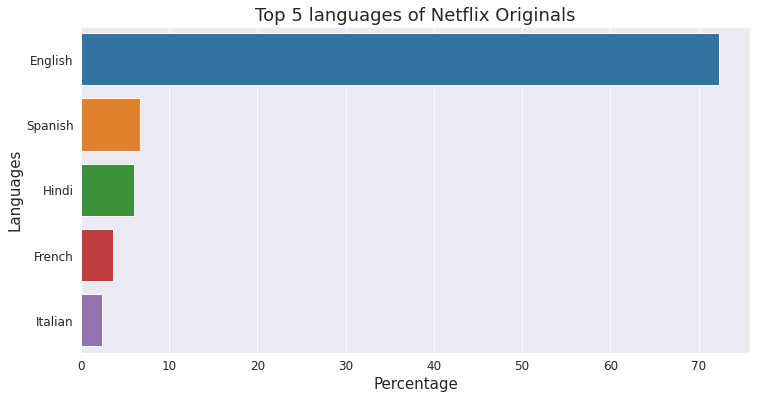

In [25]:
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")

sns.barplot(x=lang_df_percent, y=lang_df_percent.index)

plt.title("Top 5 languages of Netflix Originals",fontsize=18)
plt.xlabel("Percentage", fontsize=15)
plt.ylabel("Languages", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

From above data, we can see English is used in 72.26% of Films, distantly followed by Spanish and Hindi.

# Cleaning the Genres column
Similar to what we did with Languages, we will separate the unique values.

In [26]:
genre_df = split_multicolumn(films.Genre)
genre_df

,Documentary,One-man show,Concert Film,Animation,Christmas,Comedy,Adventure,Drama,Crime drama,Animation,...,Supernatural drama,Romantic teenage drama,Science fiction adventure,Teen comedy-drama,Anime,Romance drama,Superhero-Comedy,Political thriller,Horror anthology,Heist film
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
582,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
genre_count = genre_df.sum().sort_values(ascending=False)
genre_count

Documentary          159
Drama                 81
Comedy                57
Romantic comedy       40
Thriller              38
                    ... 
Holiday                1
Adventure-romance      1
Dance comedy           1
Comedy mystery         1
Heist film             1
Length: 98, dtype: int64

#  Top 10 Genres

In [28]:
genre_count.head(10)

Documentary        159
Drama               81
Comedy              57
Romantic comedy     40
Thriller            38
Science fiction     16
Comedy-drama        15
Crime drama         12
Horror              12
Action              11
dtype: int64

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "apoorvaanurag/netflix-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/apoorvaanurag/netflix-analysis


'https://jovian.ai/apoorvaanurag/netflix-analysis'

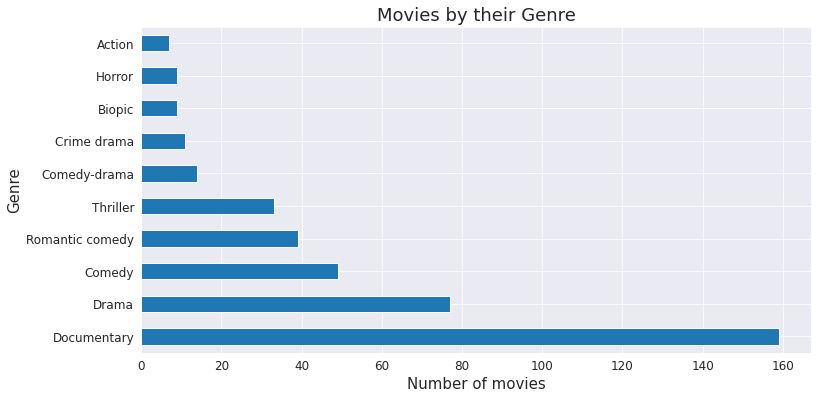

In [30]:
plt.figure(figsize=(12,6))

films.Genre.value_counts().head(10).plot(kind='barh')

plt.title("Movies by their Genre", fontsize=18)
plt.xlabel("Number of movies", fontsize=15)
plt.ylabel("Genre", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

By a huge margin, documentary remains the widely explored genre. 

# Tagging Titles based on Average rating

In [31]:
films

,Title,Genre,Premiere,Runtime,IMDB,Language,Year,Month
0,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020,10
1,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020,12
2,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018,12
3,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015,10
4,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018,12
...,...,...,...,...,...,...,...,...
579,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10
580,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1
581,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12
582,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8


In [32]:
films.IMDB.mean()

6.271746575342473

In [33]:
films['Average'] = np.where(
    films['IMDB']>6.27,
    'Above',
    np.where(
        films['IMDB']==6.27,
        'Exact',
        'Below'
    )
)

In [34]:
films

,Title,Genre,Premiere,Runtime,IMDB,Language,Year,Month,Average
0,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020,10,Above
1,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020,12,Above
2,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018,12,Above
3,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015,10,Above
4,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018,12,Above
...,...,...,...,...,...,...,...,...,...
579,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,Below
580,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1,Below
581,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,Below
582,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,Below


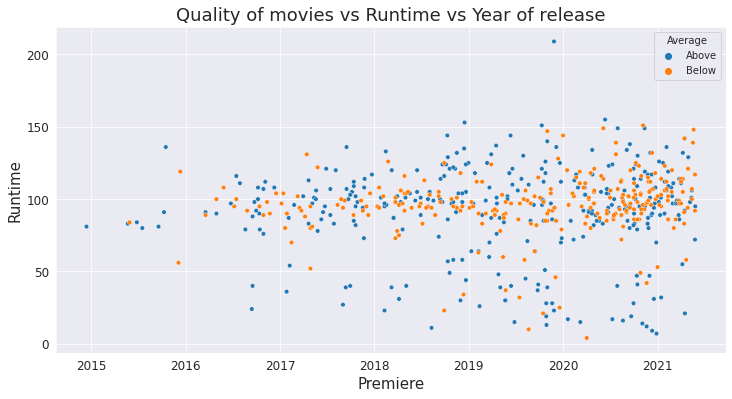

In [35]:
plt.figure(figsize=(12,6))
plt.title("Quality of movies vs Runtime vs Year of release", fontsize=18)

sns.scatterplot(data=films, x='Premiere', y='Runtime', hue='Average',s=20)

plt.xlabel('Premiere',fontsize=15)
plt.ylabel('Runtime',fontsize=15)
plt.tick_params(labelsize=12);

* Cluster of blue dots exists more in sub-100 minutes region than yellow dots.  
* Indicating above-avg movies could have a shorter runtime than below-avg movies.  
  
* Till 2018, a lot of movies produced were above-average in quality as per the current parameters.  
* We infer this from the high density of blue-dots before 2018.

In [36]:
films[films['Average']=='Below'].Runtime.mean()

96.34351145038168

In [37]:
films[films['Average']=='Above'].Runtime.mean()

91.32608695652173

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "apoorvaanurag/netflix-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/apoorvaanurag/netflix-analysis


'https://jovian.ai/apoorvaanurag/netflix-analysis'

## Analysing Premiere trends over 3 years
We restrict ourselves to 2018-2020 phase.

### Preparing data for a multiline plot using seaborn.

In [39]:
stuff2018 = films[films.Year == 2018]
countt2018 = stuff2018['Month'].value_counts().sort_index(ascending = True)

stuff2019 = films[films.Year == 2019]
countt2019 = stuff2019['Month'].value_counts().sort_index(ascending = True)

stuff2020 = films[films.Year == 2020]
countt2020 = stuff2020['Month'].value_counts().sort_index(ascending = True)

month = [i for i in range (1, 13, 1)]

count_years = pd.DataFrame(list(zip(countt2018, countt2019, countt2020)), index = month, columns = ["2018", "2019", "2020"])

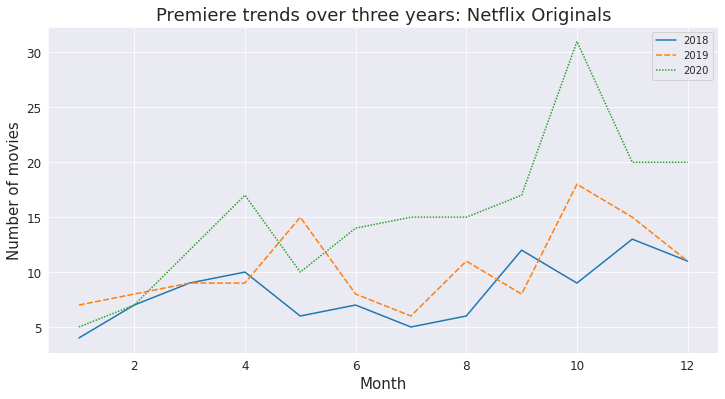

In [40]:
plt.figure(figsize=(12,6))

sns.lineplot(data=count_years)

plt.title('Premiere trends over three years: Netflix Originals', fontsize=18)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Number of movies', fontsize=15);
plt.tick_params(labelsize=12)

1. The initial releases begin in the February-May phase.  
2. June-August sees a drop in releases. 
3. September-November see the highest number of movies premiered.  
4. 2020 has a significantly higher number of movies. This could be inspired by the spike in digital content consumption during pandemic. 


In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "apoorvaanurag/netflix-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/apoorvaanurag/netflix-analysis


'https://jovian.ai/apoorvaanurag/netflix-analysis'

In [42]:
films_per_year = films.Year.value_counts()
films_per_year

2020    183
2019    125
2018     99
2021     71
2017     66
2016     30
2015      9
2014      1
Name: Year, dtype: int64

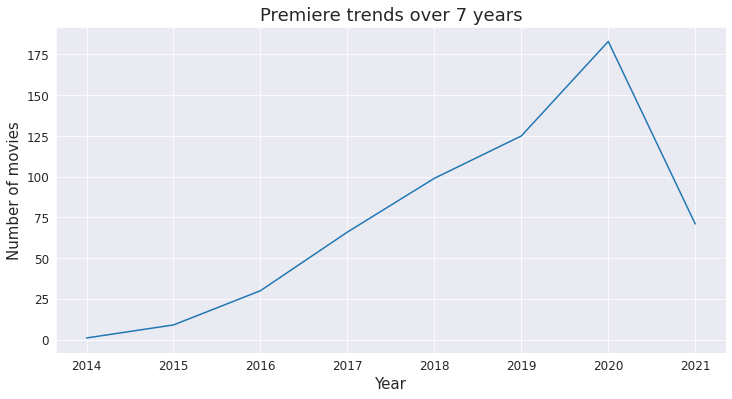

In [43]:
plt.figure(figsize=(12,6))

sns.lineplot(data=films_per_year)

plt.title('Premiere trends over 7 years', fontsize=18)
plt.xlabel('Year', fontsize=15);
plt.ylabel('Number of movies', fontsize=15);
plt.tick_params(labelsize=12)

The slope becomes steeper in 2020, indicating a significant increase in Netflix Originals production.  
Note: The data for 2021 has only been procured till 6th June 2021, and is incomplete. 

## Filtering out movies based on quality into separate dataframes for cleaner analysis

In [44]:
below_average = films.query('IMDB<=6.27')

In [45]:
below_average.Runtime.mean()

96.34351145038168

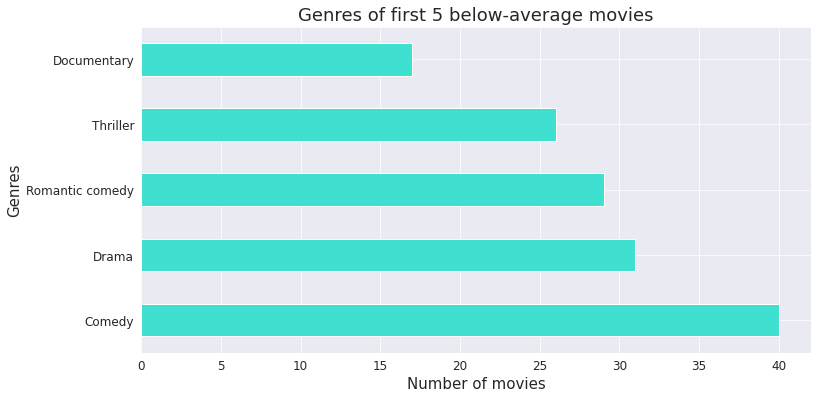

In [46]:
plt.figure(figsize=(12,6))

below_average.Genre.value_counts().head(5).plot(kind='barh', color='turquoise')

plt.xlabel("Number of movies", fontsize=15)
plt.ylabel("Genres", fontsize=15)
plt.title("Genres of first 5 below-average movies", fontsize=18);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Comedy movies are more prone to failure at box-office than any other genre.  
Other genres like Drama, Romantic Comedy and Thriller are not far behind.**

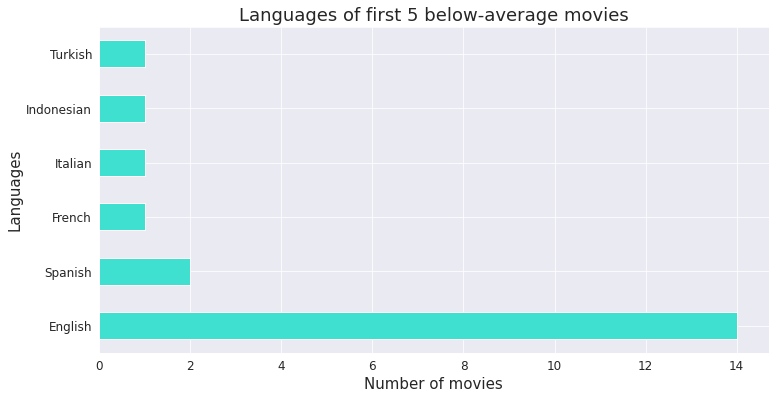

In [47]:
plt.figure(figsize=(12,6))

below_average.Language.head(20).value_counts().plot(kind='barh',color='turquoise')

plt.xlabel("Number of movies", fontsize=15)
plt.ylabel("Languages", fontsize=15)
plt.title("Languages of first 5 below-average movies", fontsize=18);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "apoorvaanurag/netflix-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/apoorvaanurag/netflix-analysis


'https://jovian.ai/apoorvaanurag/netflix-analysis'

In [49]:
above_average = films.query('IMDB>6.27')

In [50]:
above_average.shape

(322, 9)

In [51]:
above_average

,Title,Genre,Premiere,Runtime,IMDB,Language,Year,Month,Average
0,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020,10,Above
1,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020,12,Above
2,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018,12,Above
3,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015,10,Above
4,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018,12,Above
...,...,...,...,...,...,...,...,...,...
317,The Discovery,Science fiction/Drama,2017-03-31,102,6.3,English,2017,3,Above
318,The Babysitter,Teen comedy horror,2017-10-13,85,6.3,English,2017,10,Above
319,Spectral,Science fiction/Action,2016-12-09,108,6.3,English,2016,12,Above
320,Shimmer Lake,Crime thriller,2017-06-09,86,6.3,English,2017,6,Above


In [52]:
above_average.Runtime.mean()

91.32608695652173

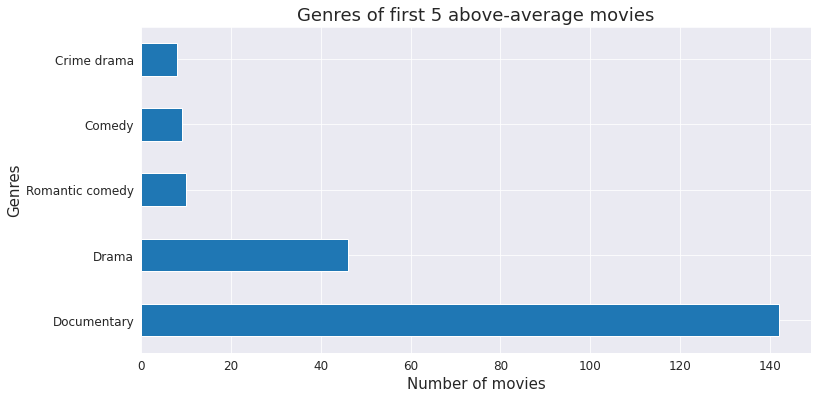

In [53]:
plt.figure(figsize=(12,6))

above_average.Genre.value_counts().head(5).plot(kind='barh')

plt.xlabel("Number of movies", fontsize=15)
plt.ylabel("Genres", fontsize=15)
plt.title("Genres of first 5 above-average movies", fontsize=18);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**By far, Documentary is the most successful genre of production.  
This is also weighed by the fact that Documentary had far less occurences in below-average range.**

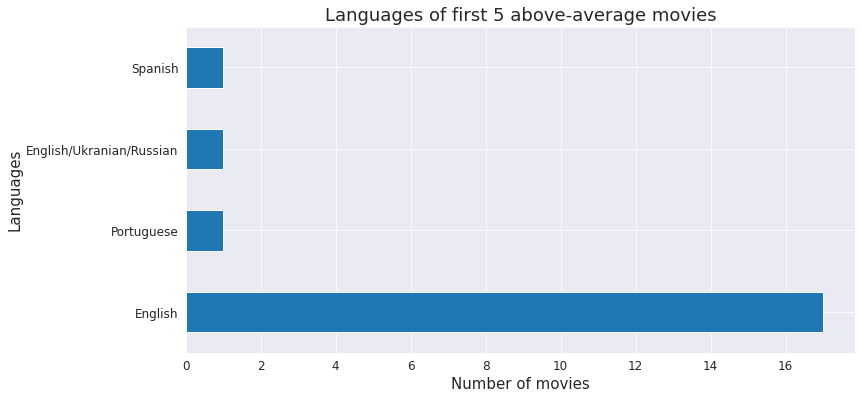

In [54]:
plt.figure(figsize=(12,6))

above_average.Language.head(20).value_counts().plot(kind='barh')

plt.xlabel("Number of movies", fontsize=15)
plt.ylabel("Languages", fontsize=15)
plt.title("Languages of first 5 above-average movies", fontsize=18);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**English remains the highly used language, irrespective of film quality.**

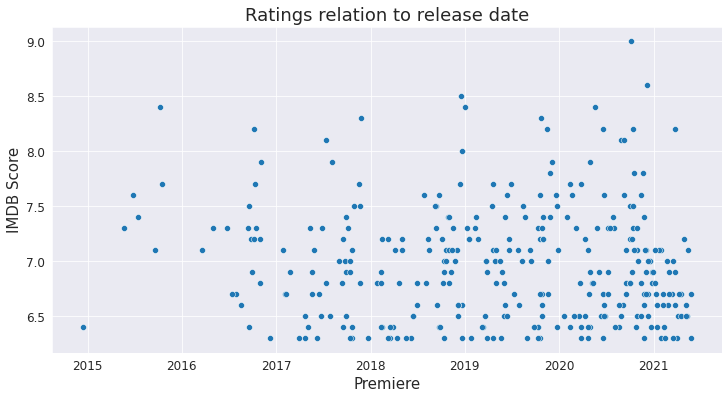

In [55]:
plt.figure(figsize=(12,6))
plt.title("Ratings relation to release date", fontsize=18)

sns.scatterplot(data=above_average, y='IMDB', x='Premiere')


plt.xlabel("Premiere", fontsize=15)
plt.ylabel("IMDB Score", fontsize=15)
plt.tick_params(labelsize=12)

We see a uniform distribution here.  
Hence, release date has no noticeable effect on IMDB scores.

### Key takeaways:  
* Documentaries have received high appreciation from the audience.  
* Most releases feature towards the end of the calendar year.  
* Catering to demand, most movies have been produced in English, completely or partially.
* Audience tends to weigh more towards content having shorter runtime.

In [ ]:
jovian.commit(project="netflix-analysis")

<IPython.core.display.Javascript object>